In [1]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_more_features_filtered.csv')

In [2]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [3]:
# Scaling the data and dividing dataset into training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2)

In [4]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=15)
DTR.fit(X_train, y_train)
DTR.score(X_test, y_test) #testing accuracy

0.9844739984586568

In [5]:
DTR.score(X_train, y_train) #training accuracy

0.9982004781554509

In [6]:

y_pred = DTR.predict(X_test)
y_pred

array([418.40833333, 485.99482759, 155.20724138, ..., 243.58548387,
       286.53076923, 409.48421053])

In [7]:
print(y_test)

[414.8 457.8 147.7 ... 264.8 279.6 410.4]


In [8]:
print(X)

[[  0  13   0 ...  55  11   7]
 [ 18   0  17 ...  30   9   6]
 [ 22  32  48 ... 130   6  13]
 ...
 [  6   2   3 ...  40   7   8]
 [ 11  57  11 ...  29   9  10]
 [ 14  33   4 ...  20   5   7]]


In [9]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5, 130, 6, 13]) #This is the same as the third sample, so we're expecting something close to 269.8 calories

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

sample_input_scaled = scaler.transform(sample_input)  # Use the same scaler from training

# Making prediction
predicted_value = DTR.predict(sample_input_scaled)

print("Predicted Calories:", predicted_value)

Predicted Calories: [271.25454545]


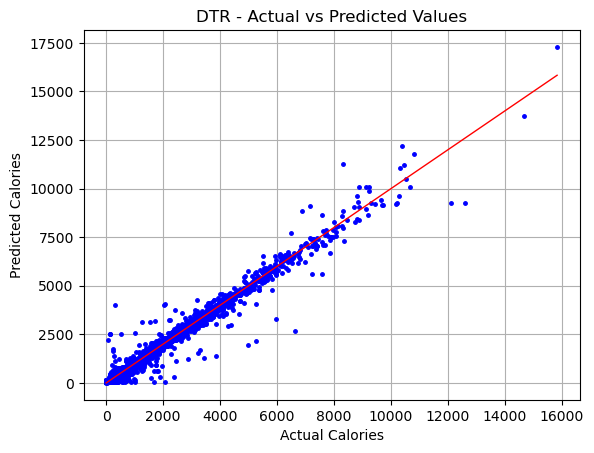

In [10]:
# Plotting predictions vs actual values
from matplotlib import pyplot as plt


#plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot(y_test, y_pred, color='b', marker=".", markersize=5, linewidth=0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linewidth=1)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("DTR - Actual vs Predicted Values")
plt.grid(True)
plt.show()


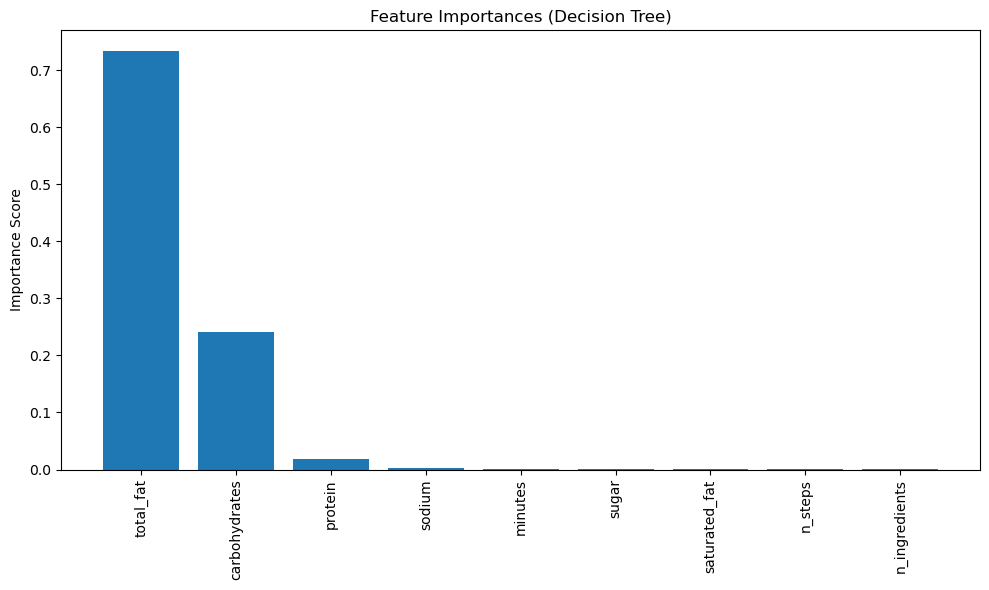

[7.33393026e-01 1.28938768e-03 1.80309498e-03 1.80019858e-02
 9.75757151e-04 2.41834143e-01 1.57235670e-03 8.62156265e-04
 2.68092620e-04]


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Getting the feature names from the data
feature_names = df.drop(columns=['calories']).columns
importances = DTR.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
print(importances)


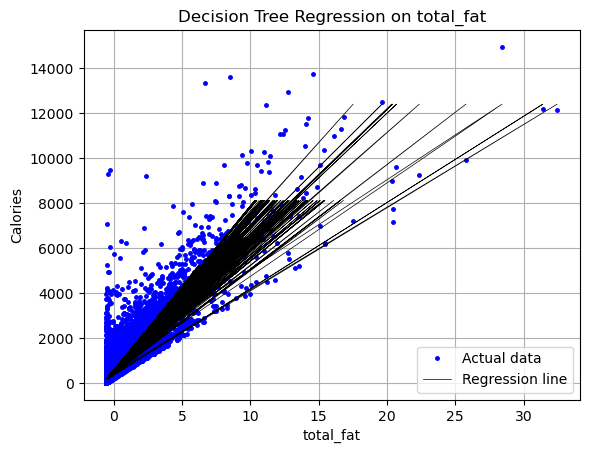

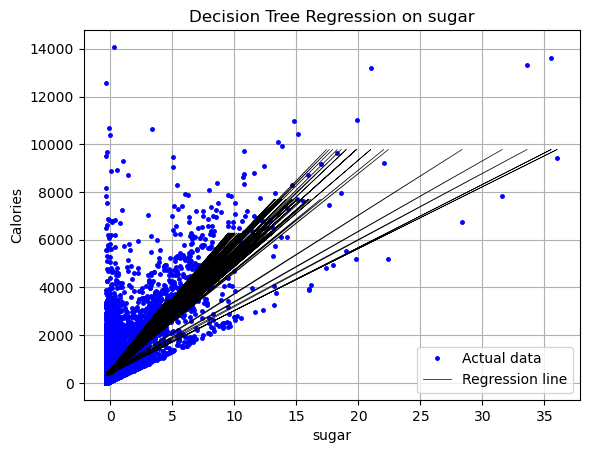

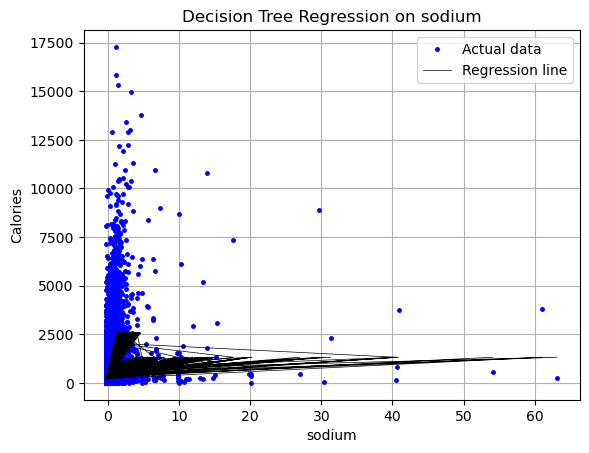

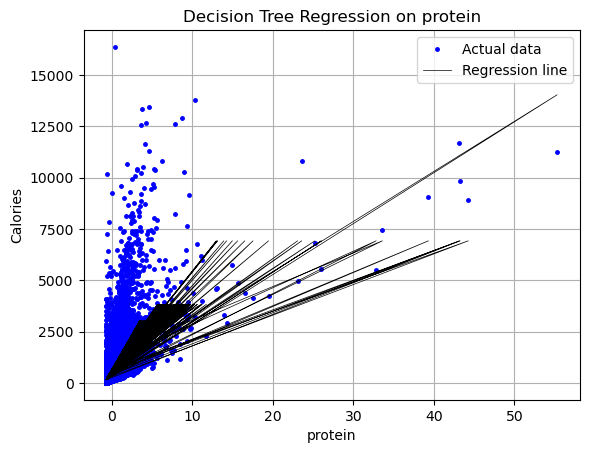

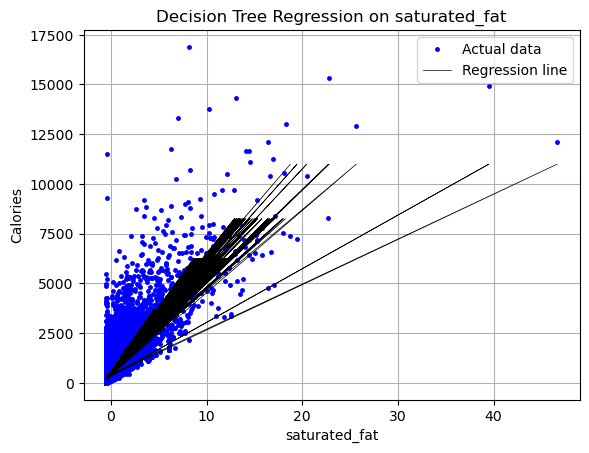

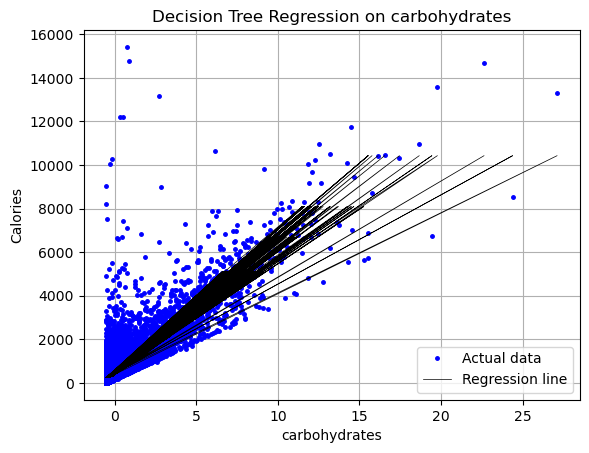

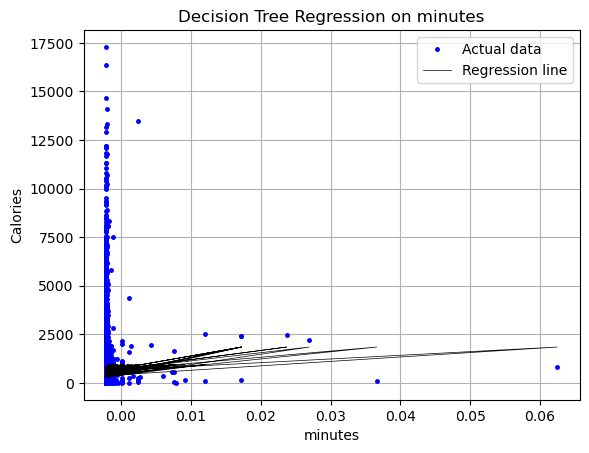

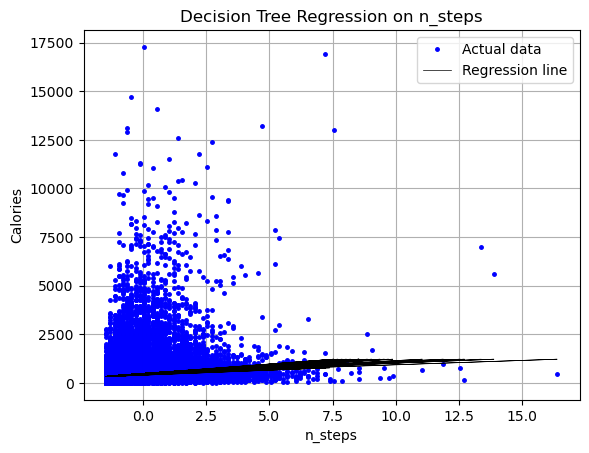

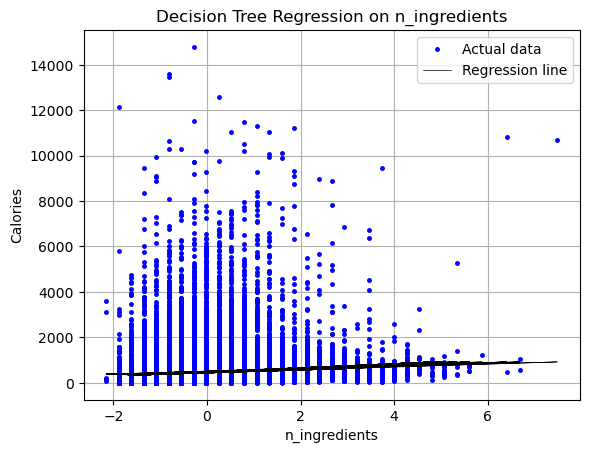

In [12]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(9):
    feature_index = i
    
    # Splitting using single feature
    X_single = X[:, feature_index].reshape(-1, 1)
    single_scaler = StandardScaler()
    X_single_scaled = single_scaler.fit_transform(X_single)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled,y, test_size = 0.2)
    
    # Fitting model using only one feature
    DTR_single = DecisionTreeRegressor(max_depth = 4)
    DTR_single.fit(X_train_single, y_train_single)
    
    y_pred_single = DTR_single.predict(X_test_single)
    
    # Plotting the actual data points
    #plt.scatter(X_single, y, color='b', label="Actual data")
    plt.plot(X_test_single, y_test_single, color='b', marker=".", markersize=5, linewidth=0, label="Actual data")    
    # Plotting the regression line
    plt.plot(X_test_single, y_pred_single, color='k', linewidth=0.5, label="Regression line")

    # Getting the feature names from the data
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Decision Tree Regression on {feature_name}")
    plt.grid(True)
    plt.show()

In [13]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred) 
mape = mean_absolute_percentage_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
  
print("MAE:", mae) 
print("MAPE:", mape)
print("MSE:", mse) 
print("RMSE:", rmse)
print("r2:", r2)

MAE: 23.127757946627376
MAPE: 20438064051208.324
MSE: 7113.240722783413
RMSE: 84.34003036982743
r2: 0.9844739984586568


In [14]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTR, X, y, cv=5) #X and y will be split into folds
(scores)

array([0.98208566, 0.98463366, 0.98481942, 0.97592163, 0.97947413])

In [15]:
from sklearn.model_selection import cross_validate #more comprehensive: gives time, can show training scores, can show results for multiple metrics
scores = cross_validate(DTR, X, y, cv=5, return_train_score= True, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error')) #X and y will be split into folds
print(scores)

{'fit_time': array([1.47890782, 1.41042423, 1.43466043, 1.46601772, 1.48822641]), 'score_time': array([0.0131464 , 0.01342297, 0.01414013, 0.01577449, 0.01252174]), 'test_r2': array([0.9829566 , 0.98414425, 0.98395854, 0.98088979, 0.97864629]), 'train_r2': array([0.9981774 , 0.99850036, 0.9982946 , 0.99806638, 0.99830221]), 'test_neg_root_mean_squared_error': array([-89.41869777, -88.82997406, -85.47489434, -97.47328431,
       -92.63303034]), 'train_neg_root_mean_squared_error': array([-29.05747444, -26.15641671, -28.21317577, -29.70307924,
       -28.54619183]), 'test_neg_mean_absolute_error': array([-23.93212094, -23.44742107, -23.44870464, -24.09448042,
       -22.81940665]), 'train_neg_mean_absolute_error': array([-12.957129  , -13.0408737 , -12.90625702, -13.00458628,
       -12.78806266]), 'test_neg_mean_squared_error': array([-7995.70351065, -7890.76429224, -7305.95756198, -9501.04115503,
       -8580.8783093 ]), 'train_neg_mean_squared_error': array([-844.33682108, -684.158135

In [16]:
scores_df = pd.DataFrame(scores)
summary_df = scores_df.mean().to_frame(name="Mean")
summary_df["Std Dev"] = scores_df.std()
print(summary_df)

                                          Mean     Std Dev
fit_time                              1.455647    0.032387
score_time                            0.013801    0.001247
test_r2                               0.982119    0.002332
train_r2                              0.998268    0.000162
test_neg_root_mean_squared_error    -90.765976    4.528595
train_neg_root_mean_squared_error   -28.335268    1.341574
test_neg_mean_absolute_error        -23.548427    0.499253
train_neg_mean_absolute_error       -12.939382    0.098567
test_neg_mean_squared_error       -8254.868966  830.571944
train_neg_mean_squared_error       -804.327246   74.662571


[Text(0.7394837608848543, 0.96875, 'x[0] <= 2.201\nsquared_error = 466097.503\nsamples = 185288\nvalue = 469.056'),
 Text(0.5379350765700208, 0.90625, 'x[5] <= 1.386\nsquared_error = 136595.629\nsamples = 180723\nvalue = 393.888'),
 Text(0.6387094187274376, 0.9375, 'True  '),
 Text(0.3384721414807467, 0.84375, 'x[0] <= 0.105\nsquared_error = 69119.415\nsamples = 176311\nvalue = 358.481'),
 Text(0.17560583208663977, 0.78125, 'x[5] <= -0.061\nsquared_error = 26363.864\nsamples = 139699\nvalue = 264.144'),
 Text(0.08811121861584494, 0.71875, 'x[0] <= -0.301\nsquared_error = 14873.132\nsamples = 104231\nvalue = 206.879'),
 Text(0.0409705509301418, 0.65625, 'x[5] <= -0.296\nsquared_error = 8088.677\nsamples = 63685\nvalue = 142.37'),
 Text(0.018934971380252373, 0.59375, 'x[3] <= -0.177\nsquared_error = 7534.37\nsamples = 40055\nvalue = 110.207'),
 Text(0.00781514244828932, 0.53125, 'x[0] <= -0.442\nsquared_error = 6244.251\nsamples = 34099\nvalue = 92.891'),
 Text(0.003933589176531807, 0.46

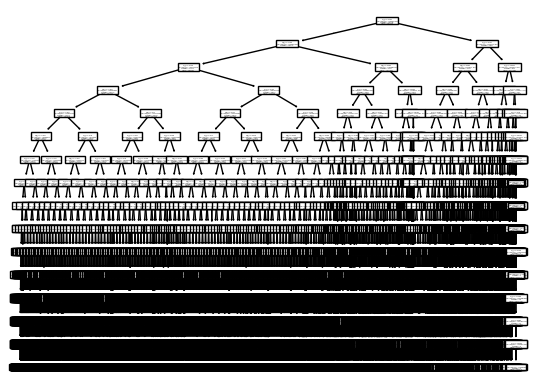

In [17]:
from sklearn import tree
tree.plot_tree(DTR)